/home/julian/anaconda3/envs/MDanalysis/lib/python3.7/site-packages/ipykernel_launcher.py:21: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
/home/julian/anaconda3/envs/MDanalysis/lib/python3.7/site-packages/ipykernel_launcher.py:22: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
/home/julian/anaconda3/envs/MDanalysis/lib/python3.7/site-packages/MDAnalysis/visualization/streamlines.py:204: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if square_1_centroid == 'empty' or square_2_centroid == 'empty':
/home/julian/anaconda3/envs/MDanalysis/lib/python3.7/site-packages/MDAnalysis/visualization/streamlines.py:204: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if square_1_centroid == 'empty' or square_2_centroid == 'empty':
/home/julian/a

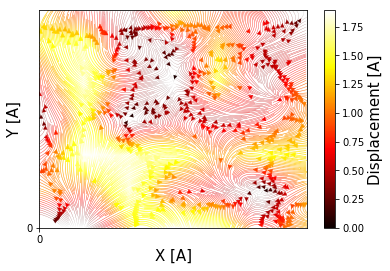

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import MDAnalysis, MDAnalysis.visualization.streamlines

#program input with box size, grid(resolution), start frame, end frame, atom selection
input_selection = "name P"
grid = 8
xmin_in = 0
xmax_in = 64
ymin_in = 0
ymax_in = 64
startf = 10
endf = 11
dt = 100
n_cores = 4
nb_squares_x = (xmax_in-xmin_in)/grid - 1
nb_squares_y = (ymax_in-ymin_in)/grid - 1

#generate streamline plot using .gro and .xtc
for i in range(startf, endf,dt):
    
    next_frame = i+dt
    x = np.linspace(xmin_in,xmax_in,nb_squares_x)
    y = np.linspace(ymin_in,ymax_in,nb_squares_y)

    u, v, average_displacement, standard_deviation = MDAnalysis.visualization.streamlines.generate_streamlines('dmpg.gro','dmpg.xtc', grid_spacing = grid, MDA_selection =input_selection, start_frame=startf, end_frame=next_frame, xmin = xmin_in, xmax = xmax_in, ymin = ymin_in , ymax = ymax_in, maximum_delta_magnitude = 5.0, num_cores=n_cores)

    speed = np.sqrt(u*u + v*v)
    fig = plt.figure()
    ax = fig.add_subplot(111)

    plt.xlabel('X [A]', size=15)
    plt.ylabel('Y [A]', size=15)

    im = ax.streamplot(x,y,u,v,density=(8,8),color =speed, linewidth=speed/speed.max(),cmap='hot')

    cbar = plt.colorbar(im.lines)
    cbar.set_label('Displacement [A]',size=15)
    plt.axis([xmin_in,xmax_in,ymin_in,ymax_in])
    ax.set_xlim([xmin_in,xmax_in])
    ax.set_ylim([ymin_in,ymax_in])
    ax.set_xticks(np.arange(xmin_in,xmax_in,200))
    ax.set_yticks(np.arange(ymin_in,ymax_in,200))
    #fig.savefig('streamlines.png',dpi=200)